# Project 1 = OIL PRICE PREDECTION [ Team-4 ]

Objective: Oil is a product that goes completely in a different direction for a single market event as the oil prices are rarely based on real-time data, instead, it is driven by externalities making our attempt to forecast it even more challenging As the economy will be highly affected by oil prices our model will help to understand the pattern in prices to help the customers and businesses to make smart decisions.

In [1]:
import pandas as pd

# Import Data

In [2]:

data = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls")

In [3]:
data

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


# Exploratory data analysis

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [5]:
data

,Price
Date,
2012-04-02,105.25
2012-04-03,104.02
2012-04-04,101.53
2012-04-05,103.29
2012-04-06,NaN
...,...
2023-06-06,71.71
2023-06-07,72.52
2023-06-08,71.28


data contain nan values so we need to replace with mean median or remove it 

<Axes: xlabel='Date'>

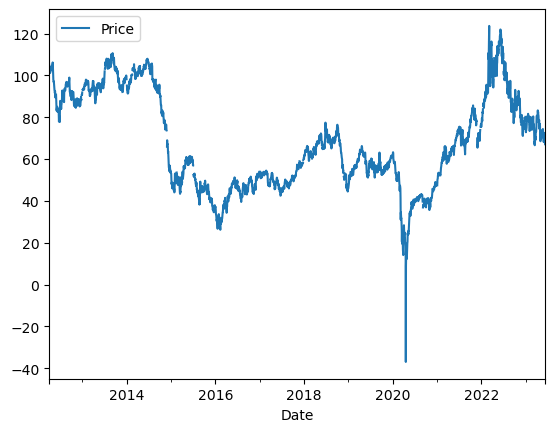

In [6]:
data.plot()

In [7]:
data.describe()

,Price
count,2812.000000
mean,67.922219
std,22.579956
min,-36.980000
25%,49.590000
50%,63.455000
75%,88.922500
max,123.640000


In [8]:
# find how many null values are present in coloum
data['Price'].isna().sum()

109

In [9]:
# remove null values
data['Price'] = data.dropna()


In [10]:
# Converting negative values to positive
data['Price'] = data['Price'].abs()

<Axes: xlabel='Date'>

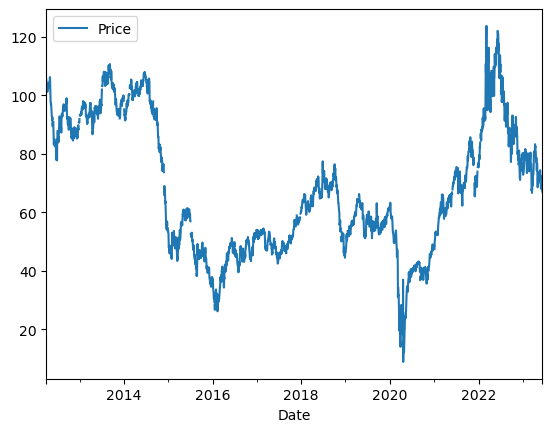

In [11]:
data.plot()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2921 entries, 2012-04-02 to 2023-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2812 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


In [13]:

# Remove NaN values from the dataset
data = data.dropna()

# Reset the index (optional)
data = data.reset_index(drop=True)

# Verify the changes
print(data.head())

    Price
0  105.25
1  104.02
2  101.53
3  103.29
4  102.45


In [14]:
data

,Price
0,105.25
1,104.02
2,101.53
3,103.29
4,102.45
...,...
2807,71.71
2808,72.52
2809,71.28
2810,70.16


<Axes: >

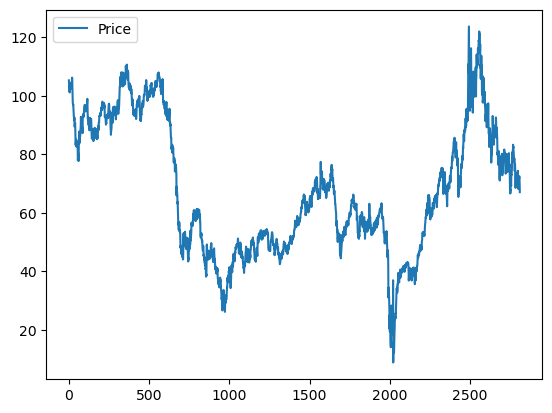

In [15]:
data.plot()

# normalization 

Shapiro-Wilk Test:
Statistic: 0.9594357013702393
P-value: 2.3988682348787653e-27
The data is not normally distributed.


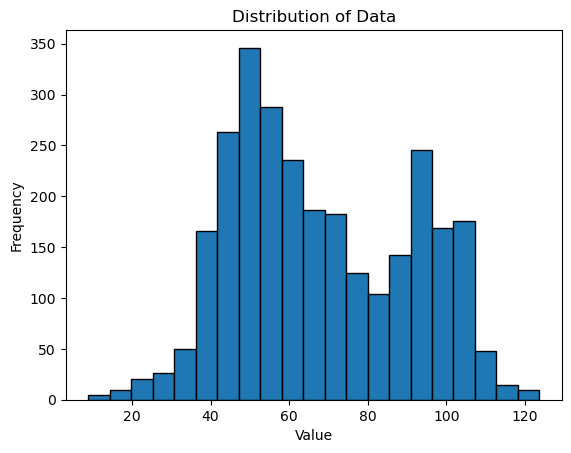

In [16]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Select the column for analysis (e.g., "Price")
column_data = data['Price']

# Perform normality test (Shapiro-Wilk test)
statistic, p_value = stats.shapiro(column_data)

# Set significance level
alpha = 0.05

# Print the test results
print("Shapiro-Wilk Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if data is normally distributed
if p_value > alpha:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

# Create a histogram to visualize the distribution
plt.hist(column_data, bins='auto', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.show()


In [17]:
from scipy.stats import boxcox

# Perform Box-Cox transformation
transformed_data, lambda_value = boxcox(column_data)

# Print the optimal lambda value
print("Optimal lambda value:", lambda_value)

Optimal lambda value: 0.5388149164278092


Shapiro-Wilk Test on Transformed Data:
Statistic: 0.9692103266716003
P-value: 4.168069260605978e-24
The transformed data is not normally distributed.


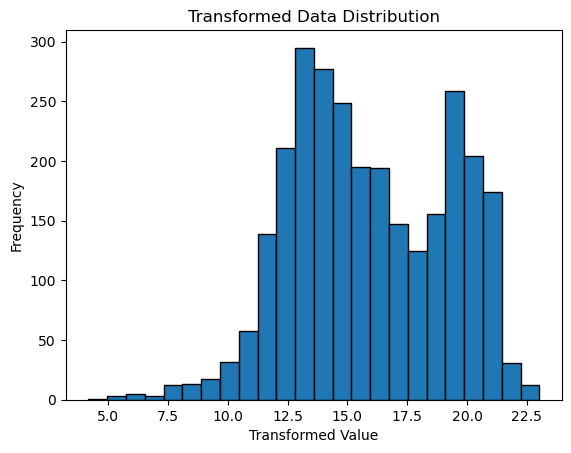

In [18]:
from scipy.stats import boxcox, shapiro

# Perform normality test on the transformed data (Shapiro-Wilk test)
statistic, p_value = shapiro(transformed_data)

# Set significance level
alpha = 0.05

# Print the test results
print("Shapiro-Wilk Test on Transformed Data:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if transformed data is normally distributed
if p_value > alpha:
    print("The transformed data is normally distributed.")
else:
    print("The transformed data is not normally distributed.")

# Create a histogram to visualize the distribution of the transformed data
plt.hist(transformed_data, bins='auto', edgecolor='black')
plt.xlabel('Transformed Value')
plt.ylabel('Frequency')
plt.title('Transformed Data Distribution')
plt.show()

Shapiro-Wilk Test on Normalized Data:
Statistic: nan
P-value: 1.0
The normalized data is normally distributed.


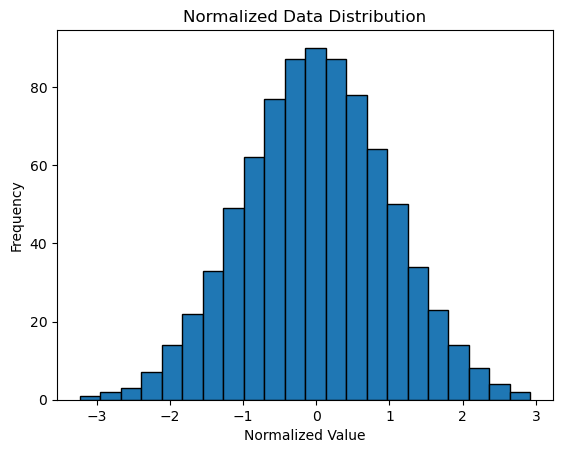

In [19]:

# Select the column for normalization (e.g., "Price")
column_data = data['Price']

# Perform quantile normalization
rank_mean = column_data.rank().mean()
rank_std = column_data.rank().std()
normalized_data = ((column_data.rank() - rank_mean) / rank_std).apply(lambda x: stats.norm.ppf(x))

# Perform normality test on the normalized data (Shapiro-Wilk test)
statistic, p_value = stats.shapiro(normalized_data)

# Set significance level
alpha = 0.05

# Print the test results
print("Shapiro-Wilk Test on Normalized Data:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if normalized data is normally distributed
if p_value > alpha:
    print("The normalized data is normally distributed.")
else:
    print("The normalized data is not normally distributed.")

# Create a histogram to visualize the distribution of the normalized data
plt.hist(normalized_data, bins='auto', edgecolor='black')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.title('Normalized Data Distribution')
plt.show()


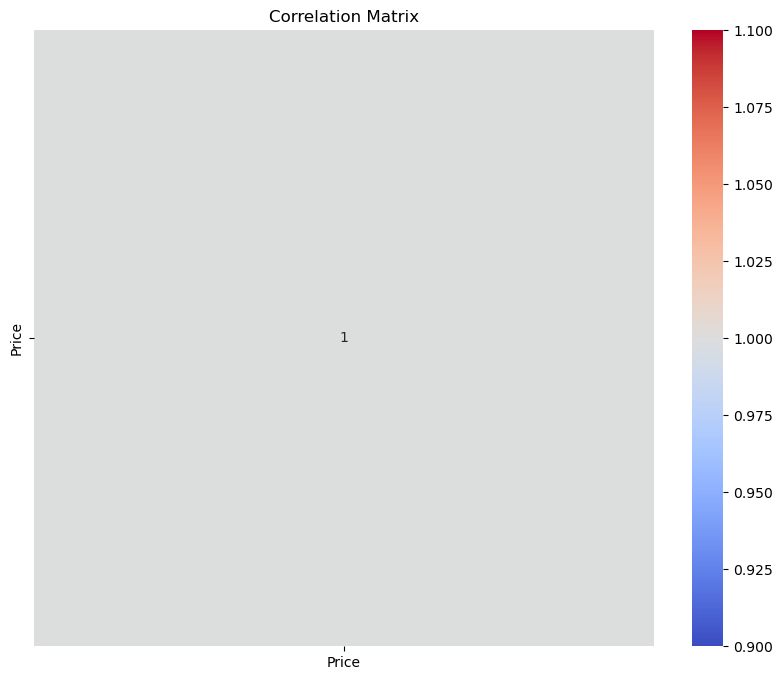

In [20]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# importing model libraries and model fitting with visualization

In [21]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression

# splitting of data

In [22]:
# Train-test split
train_size = int(len(column_data) * 0.8)
train_data, test_data = column_data[:train_size], column_data[train_size:]

In [23]:
train_data

0       105.25
1       104.02
2       101.53
3       103.29
4       102.45
         ...  
2244     64.45
2245     66.02
2246     65.59
2247     65.36
2248     64.82
Name: Price, Length: 2249, dtype: float64

In [24]:
test_data

2249    64.55
2250    59.95
2251    61.43
2252    61.48
2253    57.75
        ...  
2807    71.71
2808    72.52
2809    71.28
2810    70.16
2811    67.08
Name: Price, Length: 563, dtype: float64

# Creating functions

to calculate Root Mean Squared Error and to plot actual vs predicted values

In [25]:
# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [26]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual')
    plt.plot(predicted.index, predicted, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()
    plt.show()

# Support Vector Regression (SVR)

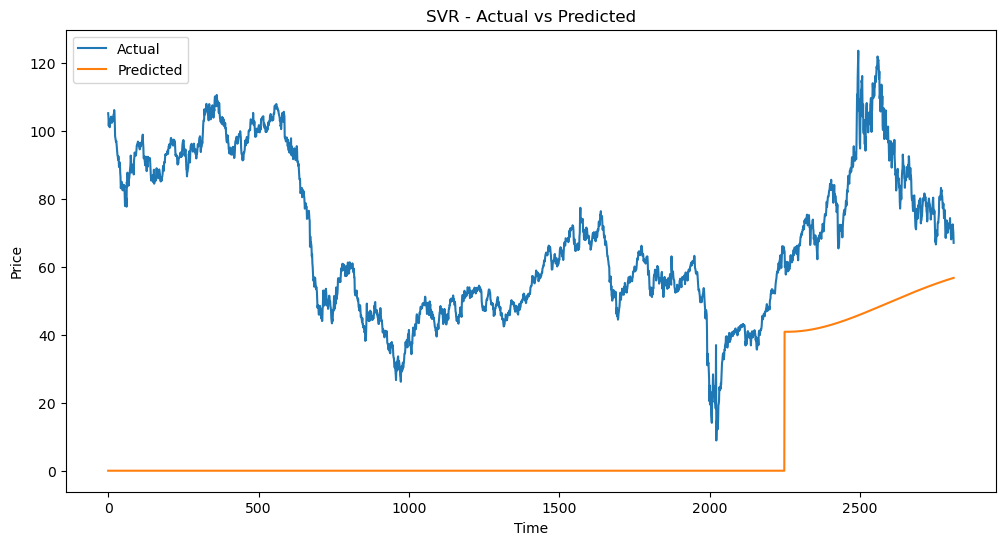

In [28]:
import numpy as np
# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)
svr_predictions = svr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))
svr_rmse = calculate_rmse(test_data, svr_predictions)
plot_actual_vs_predicted(column_data, pd.Series(np.concatenate([np.zeros(train_size), svr_predictions])), 'SVR')

# Gradient Boosting

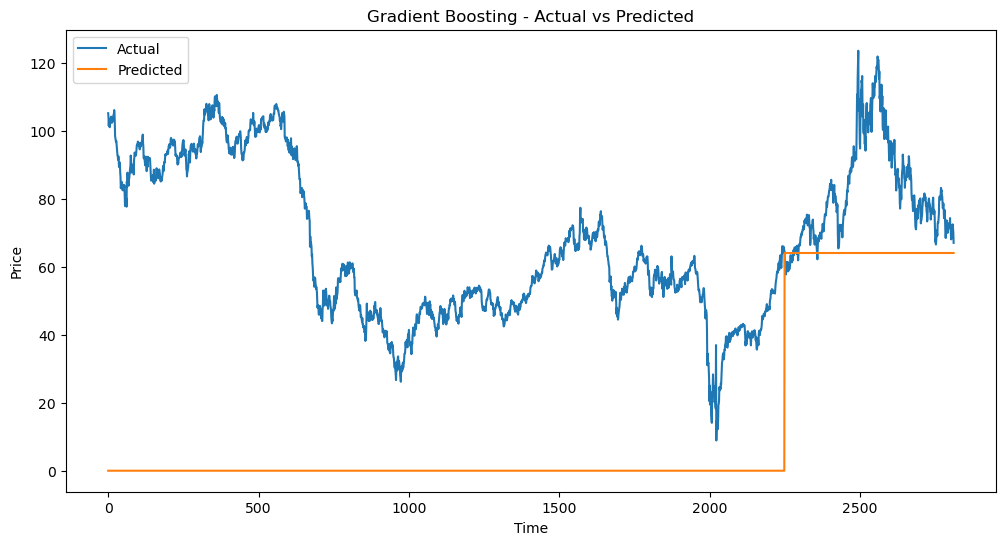

In [29]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)
gb_predictions = gb_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))
gb_rmse = calculate_rmse(test_data, gb_predictions)
plot_actual_vs_predicted(column_data, pd.Series(np.concatenate([np.zeros(train_size), gb_predictions])), 'Gradient Boosting')

# ARIMA

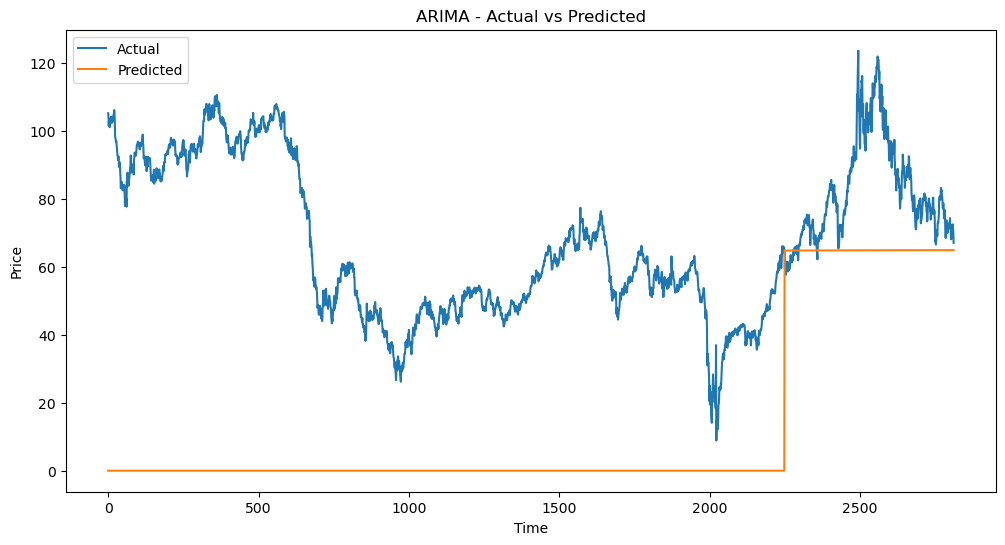

In [30]:
# ARIMA
arima_model = ARIMA(train_data, order=(1, 0, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
arima_rmse = calculate_rmse(test_data, arima_predictions)
plot_actual_vs_predicted(column_data, pd.Series(np.concatenate([np.zeros(train_size), arima_predictions])), 'ARIMA')

# Holt-Winters

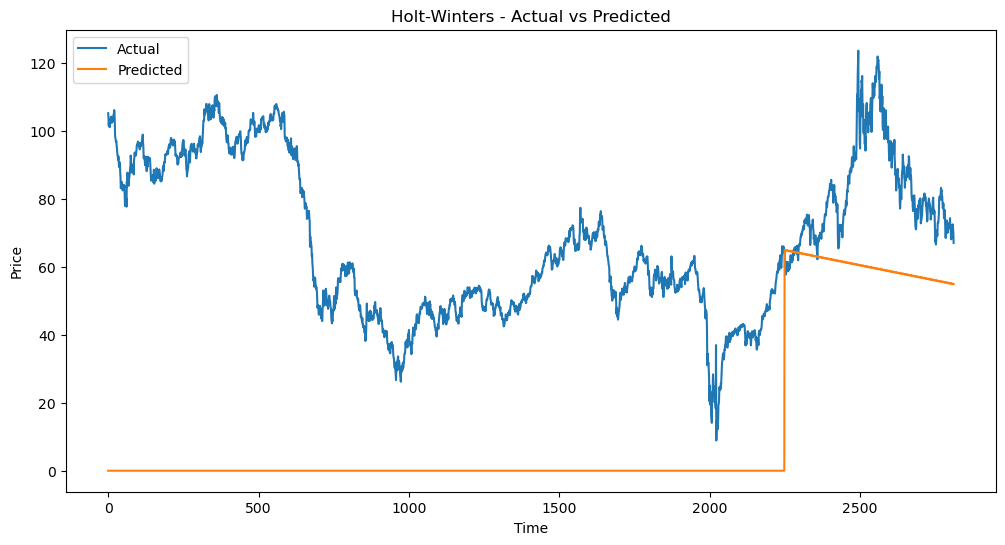

In [31]:
# Holt-Winters
holtwinters_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
holtwinters_model_fit = holtwinters_model.fit()
holtwinters_predictions = holtwinters_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
holtwinters_rmse = calculate_rmse(test_data, holtwinters_predictions)
plot_actual_vs_predicted(column_data, pd.Series(np.concatenate([np.zeros(train_size), holtwinters_predictions])), 'Holt-Winters')

# LSTM

Epoch 1/20
69/69 [==============================] - 11s 56ms/step - loss: 0.0180
Epoch 2/20
69/69 [==============================] - 4s 56ms/step - loss: 8.7357e-04
Epoch 3/20
69/69 [==============================] - 4s 56ms/step - loss: 8.3271e-04
Epoch 4/20
69/69 [==============================] - 4s 52ms/step - loss: 7.6897e-04
Epoch 5/20
69/69 [==============================] - 4s 52ms/step - loss: 7.2129e-04
Epoch 6/20
69/69 [==============================] - 4s 53ms/step - loss: 6.7329e-04
Epoch 7/20
69/69 [==============================] - 4s 52ms/step - loss: 6.7678e-04
Epoch 8/20
69/69 [==============================] - 4s 52ms/step - loss: 6.2680e-04
Epoch 9/20
69/69 [==============================] - 4s 52ms/step - loss: 6.0508e-04
Epoch 10/20
69/69 [==============================] - 6s 84ms/step - loss: 5.6325e-04
Epoch 11/20
69/69 [==============================] - 4s 50ms/step - loss: 5.3964e-04
Epoch 12/20
69/69 [==============================] - 4s 52ms/step - loss: 5.6

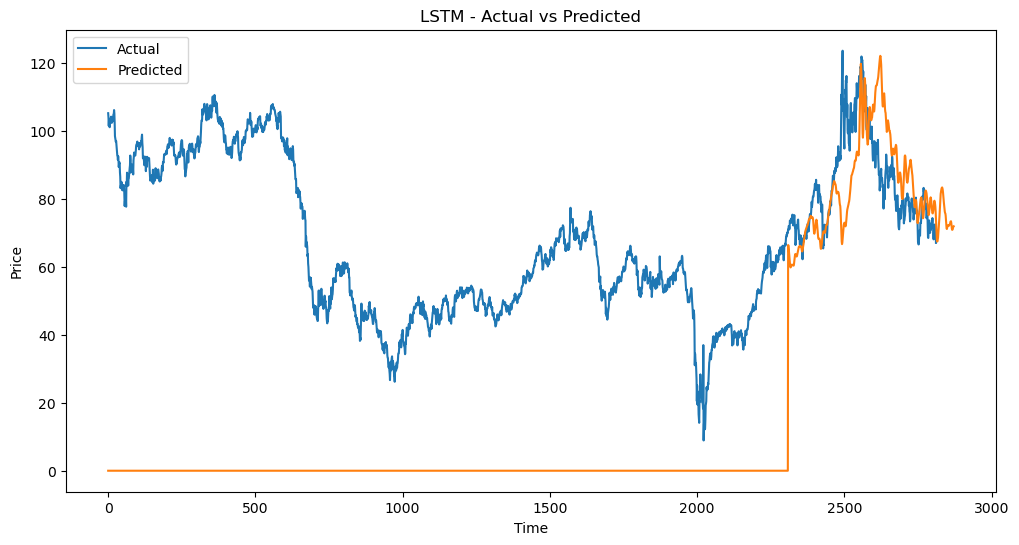

In [32]:
from sklearn.preprocessing import MinMaxScaler

# LSTM
train_data_scaled = np.array(train_data).reshape(-1, 1)
test_data_scaled = np.array(test_data).reshape(-1, 1)

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data_scaled)
test_data_scaled = scaler.transform(test_data_scaled)

X_train, y_train = [], []
for i in range(60, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

inputs = column_data[len(column_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_rmse = calculate_rmse(test_data, lstm_predictions)
plot_actual_vs_predicted(column_data, pd.Series(np.concatenate([np.zeros(train_size), np.zeros(60), lstm_predictions.flatten()])), 'LSTM')


# Linear Regression

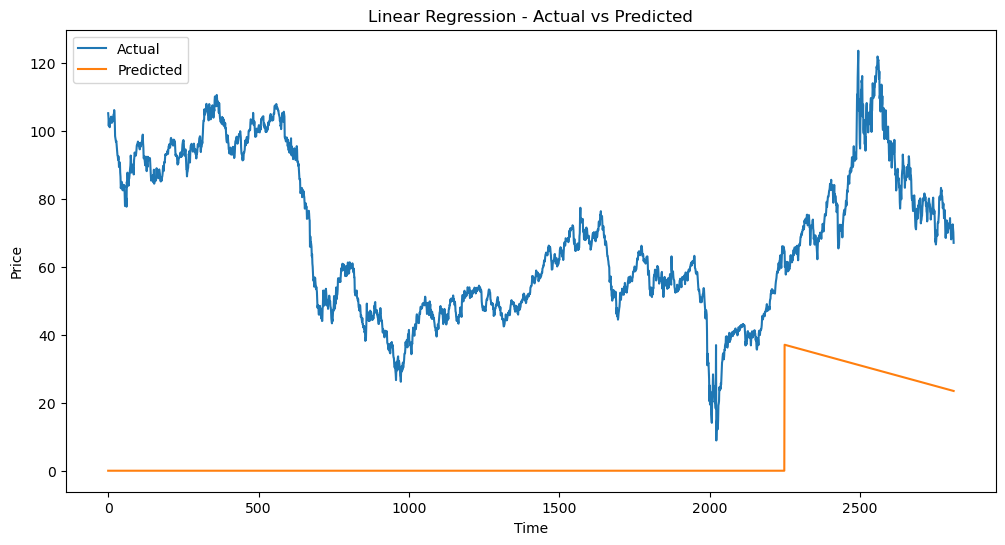

In [33]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)
linear_predictions = linear_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))
linear_rmse = calculate_rmse(test_data, linear_predictions)
plot_actual_vs_predicted(column_data, pd.Series(np.concatenate([np.zeros(train_size), linear_predictions])), 'Linear Regression')

# Model Evaluation

In [34]:
# Model Evaluation
model_names = ['SVR', 'Gradient Boosting', 'ARIMA', 'Holt-Winters', 'LSTM', 'Linear Regression']
rmse_scores = [svr_rmse, gb_rmse, arima_rmse, holtwinters_rmse, lstm_rmse, linear_rmse]

evaluation_df = pd.DataFrame({'Model': model_names, 'RMSE': rmse_scores})
evaluation_df = evaluation_df.sort_values('RMSE')

print("\nModel Evaluation - RMSE Scores:")
print(evaluation_df)



Model Evaluation - RMSE Scores:
               Model       RMSE
4               LSTM   3.789842
2              ARIMA  22.881375
1  Gradient Boosting  23.502197
3       Holt-Winters  27.400464
0                SVR  37.803234
5  Linear Regression  54.584083


In [35]:
# Select the best model
best_model_name = evaluation_df.iloc[0]['Model']
best_model = None
if best_model_name == 'SVR':
    best_model = svr_model
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
elif best_model_name == 'ARIMA':
    best_model = arima_model_fit
elif best_model_name == 'Holt-Winters':
    best_model = holtwinters_model_fit
elif best_model_name == 'LSTM':
    best_model = lstm_model
elif best_model_name == 'Linear Regression':
    best_model = linear_model


In [36]:
# Evaluate the best model on test data
best_model_predictions = best_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))
best_model_rmse = calculate_rmse(test_data, best_model_predictions)
print(f"\nBest Model ({best_model_name}) RMSE on Test Data: {best_model_rmse}")

18/18 [==============================] - 1s 3ms/step

Best Model (LSTM) RMSE on Test Data: 82.69399292110147


# final model

After evaluating all the models, we have determined that the LSTM model is performing the best.
Therefore, we have decided to choose the LSTM model as our final model for deployment.

We will now proceed with deploying the LSTM model.